In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Define features and target
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

sales_data ='/content/drive/MyDrive/Week2_data/sales_predictions_2023.csv'
df = pd.read_csv(sales_data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
# Check for duplicates
duplicates = df.duplicated()

# Display rows with duplicates, if any
duplicate_rows = df[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

# Alternatively, you can drop duplicates to remove them from the dataset
# cleaned_x_train = x_train.drop_duplicates()


Duplicate Rows:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Number of duplicates: 0


In [61]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [62]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [63]:
# Convert column 'Outlet_Size' to numeric, converting non-numeric values to NaN
#df['Outlet_Size'] = pd.to_numeric(df['Outlet_Size'], errors='coerce')

# Calculate the frequency of each value in column 'B'
value_counts_Outlet_Size = df['Outlet_Size'].value_counts()

# Find the value with the highest frequency
most_frequent_Outlet_Size = value_counts_Outlet_Size.idxmax()

# Replace NaN values in column 'B' with the most frequent value
df['Outlet_Size'].fillna(most_frequent_Outlet_Size, inplace=True)

In [64]:
# Drop column 'Item_Identifier' from the DataFrame
if 'Item_Identifier' in df.columns:
    # Drop 'Item_Identifier' column from the DataFrame
    df.drop('Item_Identifier', axis=1, inplace=True)
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [65]:

X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

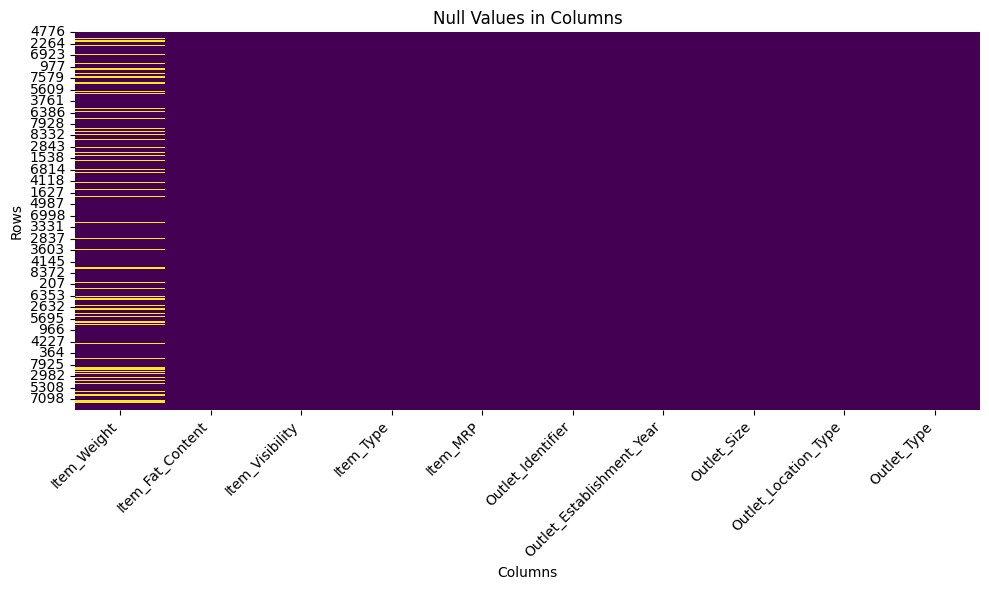

In [66]:
import seaborn as sns

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [67]:
# Convert column 'Item_Weight' to numeric, converting non-numeric values to NaN
X_train['Item_Weight'] = pd.to_numeric(X_train['Item_Weight'], errors='coerce')

# Calculate the median of the numeric column
median_Item_Weight = X_train['Item_Weight'].median()

# Replace NaN values in column 'B' with the median
X_train['Item_Weight'].fillna(median_Item_Weight, inplace=True)

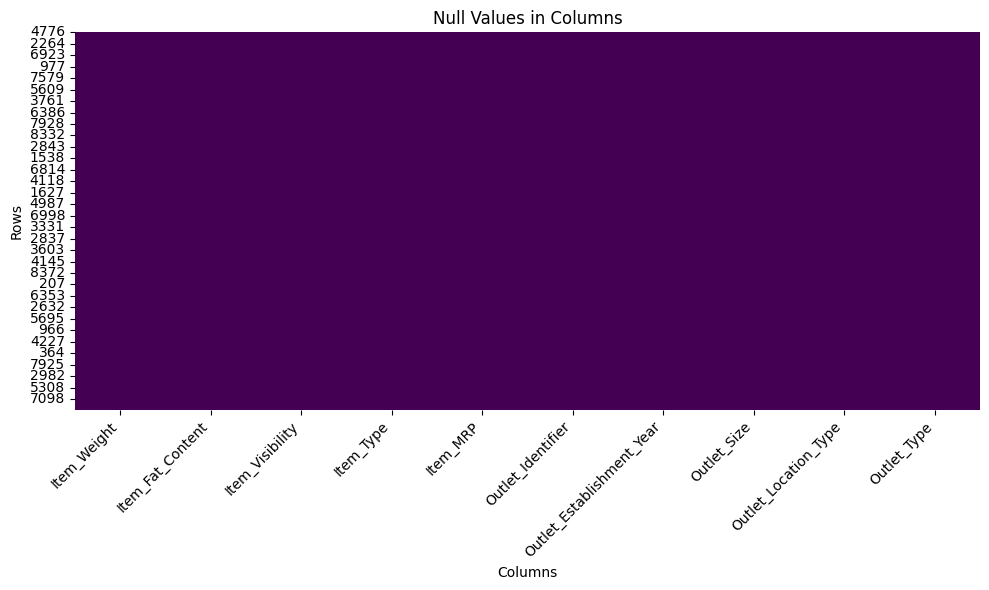

In [68]:
import seaborn as sns

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [69]:
# Convert column 'Outlet_Size' to numeric, converting non-numeric values to NaN
#df['Outlet_Size'] = pd.to_numeric(df['Outlet_Size'], errors='coerce')

# Calculate the frequency of each value in column 'B'
value_counts_Outlet_Size = X_train['Outlet_Size'].value_counts()

# Find the value with the highest frequency
most_frequent_Outlet_Size = value_counts_Outlet_Size.idxmax()

# Replace NaN values in column 'B' with the most frequent value
X_train['Outlet_Size'].fillna(most_frequent_Outlet_Size, inplace=True)

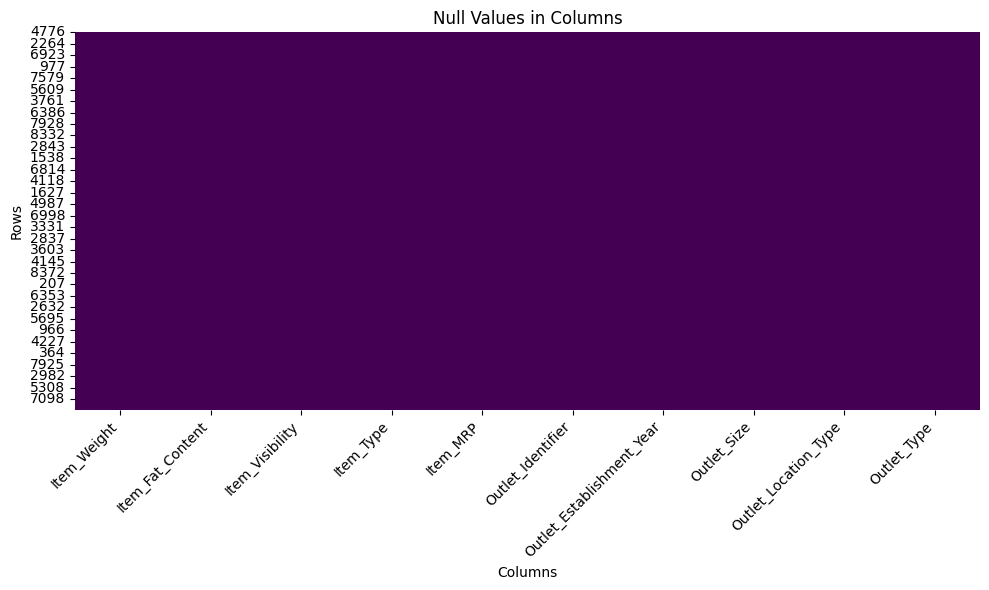

In [70]:
import seaborn as sns

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
# Check for null values
null_values = X_train.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Display columns with null values, if any
total_null_count = null_counts.sum()
print("Total number of null values:", total_null_count)


Total number of null values: 0


In [72]:
# Defining lists of types of features
numeric_columns = X_train.select_dtypes("number").columns
numeric_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [73]:
# instantiate preprocessors
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [74]:
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [75]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, numeric_columns)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [76]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes(include=['object']).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [77]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [78]:
# Fit the pipeline on the numeric training data
num_pipe.fit(X_train[numeric_columns])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [79]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)


In [80]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [81]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [82]:
# Instantiate the preprocessor/ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(), ohe_cols)])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))])

In [83]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [84]:
# Fit the model on the training data
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [85]:
# Get predictions for the training data
y_predictions_train = lin_reg.predict(X_train_processed)
# Get predictions for the testing data
y_predictions_test = lin_reg.predict(X_test_processed)

In [86]:
#Get predictions for training and test data
y_pred_train = lin_reg.predict(X_train_processed)
y_pred_test = lin_reg.predict(X_test_processed)

In [87]:
# Calculating MAE with numpy
train_MAE = np.mean(np.abs(y_pred_train - y_train))
test_MAE = np.mean(np.abs(y_pred_test - y_test))
print(f'Model Training MAE: {train_MAE:,.2f}')
print(f'Model Testing MAE: {test_MAE:,.2f}')

Model Training MAE: 847.17
Model Testing MAE: 804.19


In [88]:
# Calculating MAE with sklearn
#from sklearn.metrics import mean_absolute_error
train_MAE = mean_absolute_error(y_train, y_pred_train)
test_MAE = mean_absolute_error(y_test, y_pred_test)
print(f'Model Training MAE: {train_MAE:,.2f}')
print(f'Model Testing MAE: {test_MAE:,.2f}')

Model Training MAE: 847.17
Model Testing MAE: 804.19


In [89]:
#from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print(f'Model Training R2: {train_r2:.2f}')
print(f'Model Testing R2: {test_r2:.2f}')

Model Training R2: 0.56
Model Testing R2: 0.57


In [90]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

In [91]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [92]:
 # Test function with default arguments
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.170
- MSE = 1,297,221.414
- RMSE = 1,138.956
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.185
- MSE = 1,194,647.581
- RMSE = 1,092.999
- R^2 = 0.567


In [93]:
# Instantiate default random forest model

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
# Create and train RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_processed, y_train)

# Model Pipeline
#rf_pipe = make_pipeline(preprocessor, rf)

RandomForestRegressor(random_state=42)

In [94]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test_processed)

# Calculate mean squared error
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1209480.0624335378
R-squared Score: 0.5616201453419516


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
}

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_processed, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the results
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test_processed)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

there is an improvement after using grid_search on the model since the R2 value has been increased to 60.27% from 56% and thee MSE has also reduced to 1096008 from 1209480